# Regressão Linear Simples - Trabalho

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


In [77]:
from sklearn.model_selection import train_test_split
import numpy as np
import csv
from math import sqrt

kronor = 72.251


# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar

# Calculate coefficients
def coefficients(dataset):
      x = [row[0] for row in dataset]
      y = [row[1] for row in dataset]
      x_mean, y_mean = mean(x), mean(y)
      b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
      b0 = y_mean - b1 * x_mean
      return [b0, b1]

def simple_linear_regression(train, test):
  predictions = list()
  b0, b1 = coefficients(train)
  for row in test:
    ypred = b0 + b1 * row[0]
    predictions.append(ypred)
  return predictions

def baseline(train,test):
    predictions = list()
    for row in test:
        predictions.append(kronor)
    return predictions    


# Calculate root mean squared error
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)


# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
  test_set = list()
  for row in dataset:
    row_copy = list(row)
    row_copy[-1] = None
    test_set.append(row_copy)
  predicted = algorithm(dataset, test_set)
  #print(predicted)
  actual = [row[-1] for row in dataset]
  rmse = rmse_metric(actual, predicted)
  return rmse

 
def loadCsv(filename):
    lines = csv.reader(open(filename, "rU"), dialect = "excel")
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

dataset_ = loadCsv('insurance.csv')

train,test = train_test_split(dataset_,test_size = .4)

evalLinear = evaluate_algorithm(train, simple_linear_regression)
evalBase = evaluate_algorithm(train,baseline)

print ("RSME para Regressao linear = {:f}".format(evalLinear))
print ("RSME para baseline = {:f}".format(evalBase))

RSME para Regressao linear = 36.642878
RSME para baseline = 89.819442


In [78]:
predicted = simple_linear_regression(train,test)

In [79]:
train = np.array(train)
Xtrain = train[:,0]
Ytrain = train[:,1]

test = np.array(test)
Xtest = test[:,0]
Ytest = test[:,1]


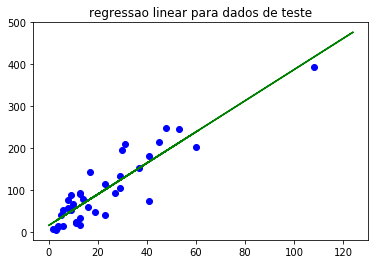

In [80]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain, Ytrain, c="blue")
plt.plot(Xtest,predicted, c="green")
plt.title("regressao linear para dados de teste")
plt.show()


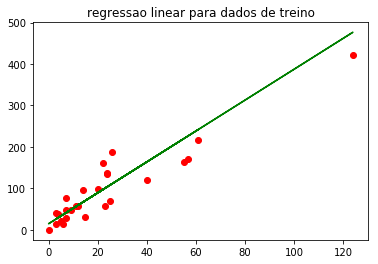

In [81]:
plt.scatter(Xtest, Ytest, c="red")
plt.plot(Xtest,predicted, c="green")
plt.title("regressao linear para dados de treino")

plt.show()